In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([ [0, 1], [1,0], [1, 1], [0, 0] ])
X

array([[0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [3]:
y = np.array([ [1], [1], [0], [0] ])
y

array([[1],
       [1],
       [0],
       [0]])

In [4]:
n_input = 2
n_hidden = 5
n_output = 1

In [5]:
Wxh = np.random.randn(n_input, n_output)
bh = np.zeros((1, n_hidden))

In [6]:
Why = np.random.randn(n_hidden, n_output)
by = np.zeros((1, n_output))

In [7]:
def tanh(z):
    numerator = 1 - (np.exp(-2*z))
    denominator = 1 + (np.exp(-2*z))
    return numerator/denominator

In [29]:
def tanh_derivative(z):
    return (4 * np.exp(-2*z)) / (1 + np.exp(-2*z)**2)

In [30]:
def forward(X, Wxh, Why):
    z1 = np.dot(X, Wxh) + bh
    a1 = tanh(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = tanh(z2)
    return z1, a1, z2, y_hat

In [31]:
def backward(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat), tanh_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T) * tanh_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy

In [32]:
def cost_f(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

In [33]:
alpha = 0.1
num_iter = 5000

In [34]:
cost = []
for i in range(num_iter):
    z1, a1, z2, y_hat = forward(X, Wxh, Why)
    dJ_dWxh, dJ_dWhy = backward(y_hat, z1, a1, z2)
    
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    c = cost_f(y, y_hat)
    cost.append(c)

Text(0, 0.5, 'cost')

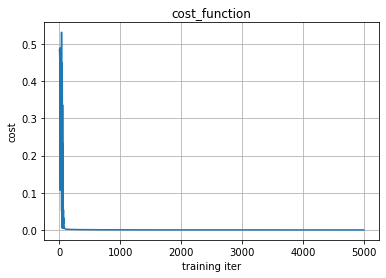

In [35]:
plt.grid()
plt.plot(range(num_iter), cost)
plt.title("cost_function")
plt.xlabel("training iter")
plt.ylabel("cost")